In [2]:
import numpy as np
import pickle

board = np.zeros((9, 9), dtype=int)

for i in range(9):
    for j in range(9):
        if i < 3:
            if j < 3:
                board[i, j] = 1
            elif j > 5:
                board[i, j] = 2
        elif i > 5:
            if j < 3:
                board[i, j] = 3
            elif j > 5:
                board[i, j] = 4


# Stored are tuples of the form (to_field: tuple, from_field: tuple | None)
possible_moves = []

for i in range(9):
    for j in range(9):
        possible_moves.append(((i + 2, j + 2), None))
for i in range(9):
    for j in range(9):
        for k in range(-2, 3):
            for l in range(-2, 3):
                if k == 0 and l == 0:
                    continue
                if 0 <= i + k < 9 and 0 <= j + l < 9:
                    possible_moves.append(((i + 2, j + 2), (i + k + 2 , j + l + 2))) # +2 because of the padding

selected_move = possible_moves[np.random.randint(0, len(possible_moves))]
print(len(possible_moves) - 81)

corner = 4 + 8 + 20 + 4 + 20 + 25

print(4 * 8 + 8 * 11 + 20 * 14 + 4 * 15 + 20 * 19 + 25 * 24)

to_field, from_field = selected_move

for i in range (9):
    for j in range (9):
        if (i, j) == to_field:
            print("T", end=" ")
        elif (i, j) == from_field:
            print("F", end=" ")
        else:
            print(".", end=" ")
    print()

pickle.dump(possible_moves, open("possible_moves.pkl", "wb"))



1440
1440
. . . . . . . . . 
. . . . . . . . . 
. . . . . . . . . 
. . . . . . . . . 
. . . . . . . . . 
. . . . . . . . . 
. . . . . . . . . 
. . . . . . . . . 
. . . . . . . . T 


True


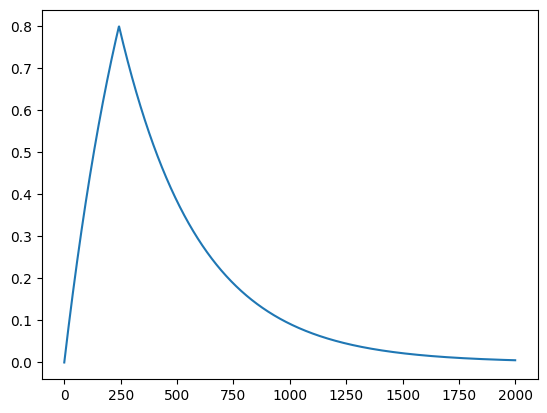

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def epsilon(max_eps: float, min_eps: float, epsilon_decay_steps: int, step: int, upwards_curve: bool = False) -> float:    
    if upwards_curve:
        max_eps = max_eps * 2
        downwards = min_eps + (max_eps - min_eps) * np.exp(-step / epsilon_decay_steps)
        upwards = max_eps - (max_eps - min_eps) * np.exp(-step / epsilon_decay_steps)
        return min(upwards, downwards)

    return min_eps + (max_eps - min_eps) * np.exp(-step / epsilon_decay_steps)


steps = np.arange(0, 2000)
epsilons = [epsilon(0.8, 0, 350, step, True) for step in steps]

plt.plot(steps, epsilons)



1521


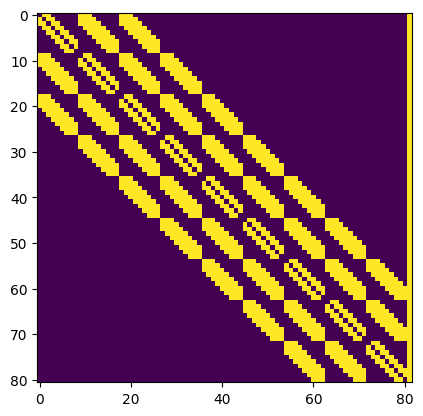

In [10]:
import torch
import matplotlib.pyplot as plt

possible_move_mask = torch.zeros(81, 82)

print(len(possible_moves))

for to_field, from_field in possible_moves:
    to_field = (to_field[0] - 2, to_field[1] - 2)
    if from_field is not None:
        from_field = (from_field[0] - 2, from_field[1] - 2)
    flattened_to = to_field[0] * 9 + to_field[1]
    if from_field is not None:
        flattened_from = from_field[0] * 9 + from_field[1]
    else:
        flattened_from = 81
    possible_move_mask[flattened_to, flattened_from] = 1



plt.imshow(possible_move_mask)

torch.save(possible_move_mask, "possible_move_mask.pt")


In [14]:
batch_size = 1
tensor1 = torch.randn(batch_size, 5)
tensor2 = torch.randn(batch_size, 5)

# Reshape tensor1 to (batch, 81, 1) and tensor2 to (batch, 1, 81)
tensor1_reshaped = tensor1.unsqueeze(2)  # Shape: (batch, 81, 1)
tensor2_reshaped = tensor2.unsqueeze(1)  # Shape: (batch, 1, 81)

# Use broadcasting to compute the element-wise average
result = (tensor1_reshaped + tensor2_reshaped) / 2

# Resulting shape is (batch, 81, 81)
# print(result.shape)

print(tensor1)
print(tensor2)
print(result)

tensor([[ 0.2499,  0.6058,  0.9662, -0.3988,  0.2980]])
tensor([[-0.4166, -0.5085,  0.9926,  0.7747, -1.5883]])
tensor([[[-0.0833, -0.1293,  0.6213,  0.5123, -0.6692],
         [ 0.0946,  0.0487,  0.7992,  0.6903, -0.4912],
         [ 0.2748,  0.2288,  0.9794,  0.8705, -0.3110],
         [-0.4077, -0.4536,  0.2969,  0.1880, -0.9935],
         [-0.0593, -0.1052,  0.6453,  0.5364, -0.6451]]])


In [36]:
import numpy as np

def action_to_index(action) -> int:
        to_index, from_index = action
        flattenedToIndex = (to_index[0] - 2) * 9 + (to_index[1] - 2)
        flattenedFromIndex = (from_index[0] - 2) * 9 + (from_index[1] - 2) if from_index is not None else 81

        return flattenedToIndex * 82 + flattenedFromIndex

def index_to_action(index: int):
    flattenedToIndex, flattenedFromIndex = index // 82, index % 82

    return (
        (flattenedToIndex // 9 + 2, flattenedToIndex % 9 + 2), 
        ((flattenedFromIndex // 9 + 2, flattenedFromIndex % 9 + 2) if flattenedFromIndex < 81 else None)
    )


index = action_to_index(((2, 2), (3, 3)))
print(index)
action = index_to_action(index)
print(action)
print(action_to_index(action))


10
((2, 2), (3, 3))
10


In [41]:
scores = [38, 19, 25, 27, 22, 0, 31, 29, 27, 13, 44, 29, 28, 10, 26, 22, 13]
result= [1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0]
print(np.average(scores))
print("Wins: ", np.sum(result))
print("Losses: ", len(result) - np.sum(result))

23.705882352941178
Wins:  9
Losses:  8


In [51]:
import numpy as np

board = np.random.randint(0, 5, (9, 9))

def transform_coords(coord: tuple[int, int], rotation_number: int, transpose: bool):
    """
    Transforms the given coordinates according to the given rotation number and transpose flag.
    The rotation number is the number of 90 degree rotations to the left.
    If the transpose flag is set to True, the coordinates are transposed after the rotation.
    """
    rotation_number = rotation_number % 4
    x, y = coord
    for _ in range(rotation_number):
        x, y = 8 - y, x
        
    if transpose:
        x, y = y, x
    return x, y


def print_board_with_coords(board: np.ndarray, coords: tuple[int, int]):
    for i in range(9):
        for j in range(9):
            if (i, j) == coords:
                print("x", end=" ")
            else:
                print(board[i, j], end=" ")
        print()

coords = (6, 3)

print_board_with_coords(board, coords)

coords = transform_coords(coords, -1, True)
board = np.rot90(board, -1).T

print('---------------')

print_board_with_coords(board, coords)

4 4 2 1 3 1 3 1 0 
0 4 4 3 3 2 1 2 3 
3 1 0 3 0 3 4 1 1 
4 2 3 2 4 4 0 0 3 
4 4 2 4 0 4 2 2 2 
3 1 3 2 0 1 4 3 4 
0 1 4 x 1 2 2 4 4 
3 1 3 3 0 0 3 3 2 
4 2 0 1 1 0 1 2 0 
---------------
4 3 0 3 4 4 3 0 4 
2 1 1 1 4 2 1 4 4 
0 3 4 x 2 3 0 4 2 
1 3 1 2 4 2 3 3 1 
1 0 1 0 0 4 0 3 3 
0 0 2 1 4 4 3 2 1 
1 3 2 4 2 0 4 1 3 
2 3 4 3 2 0 1 2 1 
0 2 4 4 2 3 1 3 0 


In [29]:
import torch

import torch.onnx
import src.agents.unet_dqn.agent as agent

# Load your PyTorch model
model = torch.load('src/agents/unet_dqn/models/agent_0/dqn.pth').to('cpu')


new_model = agent.UNet()
new_model.load_state_dict(model.state_dict())

# Dummy input for the model (adjust the shape according to your model's input)
dummy_input = torch.randn(1, 5, 9, 9)

onnx_program = torch.onnx.dynamo_export(new_model, dummy_input)

C:\Users\szasa\AppData\Local\Temp\ipykernel_34500\798665613.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('src/agents/unet_dqn/models/agent_0/dqn.pt

In [30]:
onnx_program.save('agent_0.onnx')

In [20]:
import onnx
onnx_model = onnx.load("agent_2.onnx")
onnx.checker.check_model(onnx_model)


In [24]:
import onnxruntime

onnx_input = onnx_program.adapt_torch_inputs_to_onnx(dummy_input)
print(f"Input length: {len(onnx_input)}")
print(f"Sample input: {onnx_input}")

ort_session = onnxruntime.InferenceSession("./agent_2.onnx", providers=['CPUExecutionProvider'])

def to_numpy(tensor):
    return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

onnxruntime_input = {k.name: to_numpy(v) for k, v in zip(ort_session.get_inputs(), onnx_input)}

onnxruntime_outputs = ort_session.run(None, onnxruntime_input)


Input length: 1
Sample input: (tensor([[[[-6.0233e-01, -1.2710e+00,  1.2016e-01,  1.7089e-02, -6.6608e-01,
           -5.0281e-02, -9.3696e-01, -2.4071e+00, -9.1233e-01],
          [-2.6476e-01, -2.8843e-01, -2.5406e+00, -4.8467e-01, -1.0362e+00,
            2.3556e-01, -7.7158e-01, -1.4547e+00, -5.2251e-02],
          [ 9.4902e-01,  7.0437e-02,  5.8685e-01,  1.5635e+00,  1.0744e+00,
            6.0045e-01, -1.7918e+00,  1.8069e-01,  1.0357e-01],
          [ 5.8491e-01, -1.1753e+00,  1.1309e+00,  7.5826e-02,  2.4835e-02,
           -2.6978e-01,  9.1488e-01, -4.0113e-01,  3.7586e-01],
          [ 1.9732e-01,  1.2000e+00,  5.1324e-01, -1.5337e+00,  4.2633e-01,
            1.2842e+00, -3.1156e-01,  7.8010e-01, -2.0245e-01],
          [ 6.8525e-01,  8.1031e-01,  8.9754e-02,  4.5267e-01, -1.4287e+00,
            3.5352e-01,  1.0475e+00, -5.6888e-01,  6.0528e-01],
          [-6.9813e-01, -4.1099e-01,  7.2981e-01,  1.6672e-01,  1.1028e+00,
           -3.4572e-01,  2.4700e-01,  2.8027e-01, -4.

In [28]:
torch_outputs = new_model(dummy_input)
torch_outputs = onnx_program.adapt_torch_outputs_to_onnx(torch_outputs)

assert len(torch_outputs) == len(onnxruntime_outputs)
for torch_output, onnxruntime_output in zip(torch_outputs, onnxruntime_outputs):
    torch.testing.assert_close(torch_output, torch.tensor(onnxruntime_output), rtol=1e-03, atol=1e-5)

print("PyTorch and ONNX Runtime output matched!")
print(f"Output length: {len(onnxruntime_outputs)}")
print(f"Sample output: {onnxruntime_outputs}")


PyTorch and ONNX Runtime output matched!
Output length: 1
Sample output: [array([[[[0.84668493, 0.8067858 , 0.9941124 , 0.8792983 , 0.89008284,
          0.93648386, 1.0194944 , 0.86739576, 0.3584853 ],
         [0.73743665, 0.70133865, 0.68581414, 0.76367164, 0.8010943 ,
          0.8502718 , 1.1397111 , 1.0225763 , 0.9424194 ],
         [0.78372633, 0.6307533 , 0.6411371 , 0.59705216, 0.87172735,
          0.96168244, 0.8941363 , 1.2292657 , 0.7772207 ],
         [0.79310286, 0.7968962 , 0.75953794, 0.92148125, 0.7987884 ,
          0.89855146, 1.0359988 , 0.7605597 , 1.0529174 ],
         [0.9409448 , 0.8578913 , 0.9823384 , 0.88539124, 0.8564087 ,
          0.81040883, 0.87209237, 0.8594327 , 0.8581966 ],
         [0.8597876 , 0.9251523 , 0.8967527 , 0.9870781 , 0.8640325 ,
          0.68322587, 0.9253588 , 0.8661703 , 0.8913771 ],
         [0.9354216 , 0.6636555 , 0.8258709 , 0.868742  , 0.84196436,
          0.6188425 , 0.7968222 , 0.73997056, 0.8611684 ],
         [0.8864175 , 0

In [18]:
import torch
import torch.nn as nn

random = torch.randn(1, 5, 9, 9)

pool = nn.MaxPool2d(kernel_size=3, stride=1, padding=0)

result = pool(random)

print(result.shape)




torch.Size([1, 5, 7, 7])
